### 0. Importar librerías

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Desactivamos notacion cientifica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### 1. Transformación de los datos y análisis descriptivo

#### 1.1 Lectura de datos

In [3]:
#Importamos la información de cuentas
df_cuentas = pd.read_csv('datos/BASE_CUENTAS.csv', dtype = {
    'FECHA_APERTURA': 'object', 'NEGOCIO': 'object', 'PRODUCTO': 'object', 'SALDO TOTAL': 'float', 'SALDO DISPONIBLE': 'float',
    'ACUMULADO RETIRO': 'float', 'TIPO IDENTIFICACION': 'int', 'Numero Identificación': 'object', 'CIUDAD': 'object', 'DEPARTAMENTO': 'object'}, encoding = 'utf-8')

#Solo utilizaremos datos del producto PR001
df_cuentas = df_cuentas.loc[(df_cuentas['PRODUCTO'] == 'PR001'), :]

In [4]:
#Importamos la información transaccional
df_trx = pd.read_csv('datos/BASE_TRX.csv', dtype = {
    'Tipo Transacción': 'object', 'Número de operación': 'object', 'Tipo Identificación': 'int', 'Numero Identificación': 'object', 'PRODUCTO': 'object',
    'NEGOCIO': 'object', 'Fecha y Hora Transacción': 'object', 'Valor': 'float', 'Código Canal': 'object', 'Corresponsal': 'object', 
    'Identificación del Usuario': 'object', 'Jurisdicción_usuario': 'object', 'ciudad_corresponsal': 'object', 'departamento_corresponsal': 'object'},
                    encoding = 'utf-8')

#Solo revisaremos un año atras
df_trx = df_trx.loc[(df_trx['Fecha y Hora Transacción'] > '2023-06-30 23:55:20'), :]
#Solo utilizaremos datos del producto PR001
df_trx = df_trx.loc[(df_trx['PRODUCTO'] == 'PR001'), :]
#Dejo todos los valores como positivos
df_trx['Valor'] = df_trx['Valor'].abs()

#### 1.2 Análisis descriptivo inicial

In [5]:
df_cuentas.describe(include = 'all')

,FECHA_APERTURA,NEGOCIO,PRODUCTO,SALDO TOTAL,SALDO DISPONIBLE,ACUMULADO RETIRO,TIPO IDENTIFICACION,Numero Identificación,CIUDAD,DEPARTAMENTO
count,133825,133844,133844,133844.00,133844.00,133844.00,133844.00,133844,133825,133825
unique,1972,12,1,NaN,NaN,NaN,NaN,133844,750,42
top,2022-11-09,WW005,PR001,NaN,NaN,NaN,NaN,1,Bogota D.C.,Bogota D.C.
freq,881,111942,133844,NaN,NaN,NaN,NaN,1,116005,116068
mean,NaN,NaN,NaN,37473.33,15167.82,30646.55,1.00,NaN,NaN,NaN
std,NaN,NaN,NaN,285399.04,148764.94,217244.66,0.02,NaN,NaN,NaN
min,NaN,NaN,NaN,0.00,0.00,0.00,1.00,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.00,0.00,0.00,1.00,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.00,0.00,0.00,1.00,NaN,NaN,NaN
75%,NaN,NaN,NaN,100.00,18.00,0.00,1.00,NaN,NaN,NaN


In [6]:
df_trx.describe(include = 'all')

,Tipo Transacción,Número de operación,Tipo Identificación,Numero Identificación,PRODUCTO,NEGOCIO,Fecha y Hora Transacción,Valor,Código Canal,Corresponsal,Identificación del Usuario,Jurisdicción_usuario,ciudad_corresponsal,departamento_corresponsal
count,552927,552320,552927.00,552927,552927,552927,552927,552927.00,552927,183680,460862,411354,25666,25666
unique,2,455972,NaN,27363,1,9,452961,NaN,8,4654,16607,157,222,27
top,Retiro,46249331,NaN,65441,PR001,WW005,2024-06-14 10:11:51,NaN,PD,XXXK90341,165006,Sin Información,IBAGUE,TOLIMA
freq,333047,3294,NaN,477,552927,540043,20,NaN,183570,12466,234051,364659,8870,17881
mean,NaN,NaN,1.00,NaN,NaN,NaN,NaN,289088.72,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.02,NaN,NaN,NaN,NaN,390476.30,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.00,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.00,NaN,NaN,NaN,NaN,10000.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.00,NaN,NaN,NaN,NaN,150000.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.00,NaN,NaN,NaN,NaN,500000.00,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.3 Analisis de valores faltantes

In [7]:
#Eliminamos los que tienen valores faltantes en fecha de apertura, ya que se corroboró con el negocio que es problema de digitación y no se puede recuperar esa información
df_cuentas = df_cuentas.dropna(subset = ['FECHA_APERTURA'])

df_cuentas = df_cuentas.loc[:, ~df_cuentas.columns.isin(['PRODUCTO'])]

In [8]:
#Se borran personas sin identificacion en las transacciones porque son transacciones del sistema 
df_trx = df_trx.dropna(subset = ['Numero Identificación'])

#No importa que numero de operación tenga NA, porque solo es un campo descriptivo
#Los registros con NA en corresponsal son los que no involucran la intermediación de un corresponsal no bancario (NBC)
#Los que tienen NA en identificación de usuario son transacciones donde se ha retirado el dinero sin dar una identificacion
#Los campos Jurisdicción_usuario, ciudad_corresponsal, y departamento_corresponsal no los usaremos por la cantidad de NA que tienen
df_trx = df_trx.loc[:, ~df_trx.columns.isin(['PRODUCTO', 'Número de operación', 'Jurisdicción_usuario', 'ciudad_corresponsal', 'departamento_corresponsal'])]

#### 1.4 Feature Engineering

In [9]:
#La información de la base de clientes ya está a nivel único por persona

print(len(df_cuentas))
print(len(df_cuentas.loc[:, ['Numero Identificación', 'TIPO IDENTIFICACION']].groupby(by = ['Numero Identificación', 'TIPO IDENTIFICACION']).count()))
print("El número de registros de la base de cuentas ya se encuentra de forma única por cliente.")

#Solo le hago feature engineering a la fecha de apertura, lo expreso como dias de antiguedad cliente
df_cuentas['FECHA_APERTURA'] = pd.to_datetime(df_cuentas['FECHA_APERTURA'])
fecha_especifica = pd.to_datetime('2024-06-30 23:55:20')
df_cuentas['antiguedad_cliente_dias'] = (fecha_especifica - df_cuentas['FECHA_APERTURA']).dt.days
df_cuentas = df_cuentas.loc[:, df_cuentas.columns != 'FECHA_APERTURA']

133825
133825
El número de registros de la base de cuentas ya se encuentra de forma única por cliente.


In [10]:
#Agrupamos la data transaccional
df_trx_agrupado = df_trx.groupby(by = ['Numero Identificación', 'Tipo Identificación']).agg(
    total_transacciones = ('Numero Identificación', 'count'),
    corresponsales_diferentes = ('Corresponsal', 'nunique'),
    usuarios_diferentes = ('Identificación del Usuario', 'nunique') 
)

#Obtenemos variables de interes que podrían servir para identificar perfiles atipicos\

#Primero, obtenemos la cantidad de retiros y consignaciones que ha hecho, tanto en frecuencia como en proporción
df_conteo_tipo_trans = df_trx.pivot_table(index=['Numero Identificación', 'Tipo Identificación'], columns='Tipo Transacción', values='Valor', aggfunc = 'size', fill_value=0).reset_index()
df_conteo_tipo_trans['prop_consignacion'] = df_conteo_tipo_trans['Consignación']/ (df_conteo_tipo_trans['Consignación'] + df_conteo_tipo_trans['Retiro'])
df_conteo_tipo_trans['prop_retiro'] = df_conteo_tipo_trans['Retiro']/ (df_conteo_tipo_trans['Consignación'] + df_conteo_tipo_trans['Retiro'])
df_conteo_tipo_trans.rename(columns = {'Consignación': 'cantidad_consignacion', 'Retiro': 'cantidad_retiro'}, inplace = True)

#Luego, obtenemos los promedios de transacciones tanto en retiro como en consignaciones
df_promedio_transacciones = df_trx.pivot_table(index=['Numero Identificación', 'Tipo Identificación'], columns='Tipo Transacción', values='Valor', aggfunc = 'mean', fill_value=0).reset_index()
df_promedio_transacciones = df_promedio_transacciones.loc[:, ['Numero Identificación', 'Tipo Identificación', 'Consignación', 'Retiro']]
df_promedio_transacciones.rename(columns = {'Consignación':'promedio_valor_consignacion', 'Retiro': 'promedio_valor_retiro'}, inplace = True)

#Finalmente, obtenemos el valor promedio transaccionado en cada uno de los canales, tanto para retiros como para consignaciones
df_promedio_canales = df_trx.pivot_table(index=['Numero Identificación', 'Tipo Identificación'], columns=['Código Canal', 'Tipo Transacción'], values='Valor', aggfunc = 'mean', fill_value=0)
df_promedio_canales.columns = [f'{col[0]}_{col[1]}' for col in df_promedio_canales.columns]
#df_promedio_canales = df_trx.pivot_table(index=['Numero Identificación', 'Tipo Identificación'], columns=['Código Canal'], values='Valor', aggfunc = 'mean', fill_value=0)
df_promedio_canales = df_promedio_canales.reset_index()


#Juntamos toda la información obtenida
df_trx_agrupado = df_trx_agrupado.merge(df_conteo_tipo_trans, how = 'left', on = ['Numero Identificación', 'Tipo Identificación']).merge(df_promedio_transacciones, how = 'left', on = ['Numero Identificación', 'Tipo Identificación']).merge(df_promedio_canales, how = 'left', on = ['Numero Identificación', 'Tipo Identificación'])

df_trx_agrupado.head()

,Numero Identificación,Tipo Identificación,total_transacciones,corresponsales_diferentes,usuarios_diferentes,cantidad_consignacion,cantidad_retiro,prop_consignacion,prop_retiro,promedio_valor_consignacion,...,BS_Retiro,DF_Retiro,EM_Consignación,PD_Consignación,PD_Retiro,PS_Consignación,PS_Retiro,RM_Consignación,TI_Consignación,TI_Retiro
0,1,1,12,0,2,3,9,0.25,0.75,1739148.67,...,0.00,0.00,0.00,0.00,0.00,1739148.67,0.00,0.00,0.00,579560.00
1,100004,1,345,3,4,156,189,0.45,0.55,7257.05,...,0.00,0.00,0.00,6463.41,0.00,8287.14,0.00,0.00,0.00,0.00
2,100005,1,4,0,1,2,2,0.50,0.50,251500.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,251500.00,0.00
3,100016,1,88,7,18,43,45,0.49,0.51,209085.26,...,0.00,0.00,553811.07,25200.00,311260.71,0.00,0.00,0.00,0.00,0.00
4,100017,1,130,1,5,24,106,0.18,0.82,27083.33,...,0.00,0.00,0.00,33388.89,0.00,0.00,0.00,0.00,0.00,0.00


#### 1.5 Análisis descriptivo final

In [11]:
df_final = df_cuentas.merge(df_trx_agrupado, how = 'inner', left_on = ['Numero Identificación', 'TIPO IDENTIFICACION'], right_on = ['Numero Identificación', 'Tipo Identificación'])
df_final = df_final.loc[:, ~df_final.columns.isin(['TIPO IDENTIFICACION', 'Numero Identificación', 'Tipo Identificación'])]

In [12]:
print("#################   Variables a utilizar   #################")
print(list(df_final.columns))

#################   Variables a utilizar   #################
['NEGOCIO', 'SALDO TOTAL', 'SALDO DISPONIBLE', 'ACUMULADO RETIRO', 'CIUDAD', 'DEPARTAMENTO', 'antiguedad_cliente_dias', 'total_transacciones', 'corresponsales_diferentes', 'usuarios_diferentes', 'cantidad_consignacion', 'cantidad_retiro', 'prop_consignacion', 'prop_retiro', 'promedio_valor_consignacion', 'promedio_valor_retiro', 'AP_Consignación', 'AP_Retiro', 'BS_Consignación', 'BS_Retiro', 'DF_Retiro', 'EM_Consignación', 'PD_Consignación', 'PD_Retiro', 'PS_Consignación', 'PS_Retiro', 'RM_Consignación', 'TI_Consignación', 'TI_Retiro']


In [13]:
print("#################   Tipos de variables   #################")
print(df_final.dtypes)

#################   Tipos de variables   #################
NEGOCIO                         object
SALDO TOTAL                    float64
SALDO DISPONIBLE               float64
ACUMULADO RETIRO               float64
CIUDAD                          object
DEPARTAMENTO                    object
antiguedad_cliente_dias          int64
total_transacciones              int64
corresponsales_diferentes        int64
usuarios_diferentes              int64
cantidad_consignacion            int64
cantidad_retiro                  int64
prop_consignacion              float64
prop_retiro                    float64
promedio_valor_consignacion    float64
promedio_valor_retiro          float64
AP_Consignación                float64
AP_Retiro                      float64
BS_Consignación                float64
BS_Retiro                      float64
DF_Retiro                      float64
EM_Consignación                float64
PD_Consignación                float64
PD_Retiro                      float64
PS_Co

In [14]:
print("#################   Estadísticos descriptivos   #################")
df_final.describe(include = "all")

#################   Estadísticos descriptivos   #################


,NEGOCIO,SALDO TOTAL,SALDO DISPONIBLE,ACUMULADO RETIRO,CIUDAD,DEPARTAMENTO,antiguedad_cliente_dias,total_transacciones,corresponsales_diferentes,usuarios_diferentes,...,BS_Retiro,DF_Retiro,EM_Consignación,PD_Consignación,PD_Retiro,PS_Consignación,PS_Retiro,RM_Consignación,TI_Consignación,TI_Retiro
count,27362,27362.00,27362.00,27362.00,27362,27362,27362.00,27362.00,27362.00,27362.00,...,27362.00,27362.00,27362.00,27362.00,27362.00,27362.00,27362.00,27362.00,27362.00,27362.00
unique,9,NaN,NaN,NaN,458,38,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WW005,NaN,NaN,NaN,Bogota D.C.,Bogota D.C.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,26053,NaN,NaN,NaN,19256,19281,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,162100.80,53479.10,146884.32,NaN,NaN,420.57,20.21,1.86,2.90,...,34176.87,12209.91,113001.31,36454.21,135245.73,165230.18,66.38,1727.82,98968.00,115858.88
std,NaN,593671.44,283672.33,454872.36,NaN,NaN,255.00,34.48,3.47,3.32,...,422271.44,183529.57,255817.99,147876.58,208355.28,561826.59,7291.63,51989.63,204053.63,285705.85
min,NaN,0.00,0.00,0.00,NaN,NaN,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,NaN,0.00,0.00,0.00,NaN,NaN,252.00,4.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,NaN,100.00,0.00,0.00,NaN,NaN,368.00,7.00,1.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,NaN,3500.00,500.00,0.00,NaN,NaN,589.00,20.00,2.00,3.00,...,0.00,0.00,0.00,0.00,222000.00,169854.47,0.00,0.00,133750.00,113584.93


#################   Análisis gráfico   #################


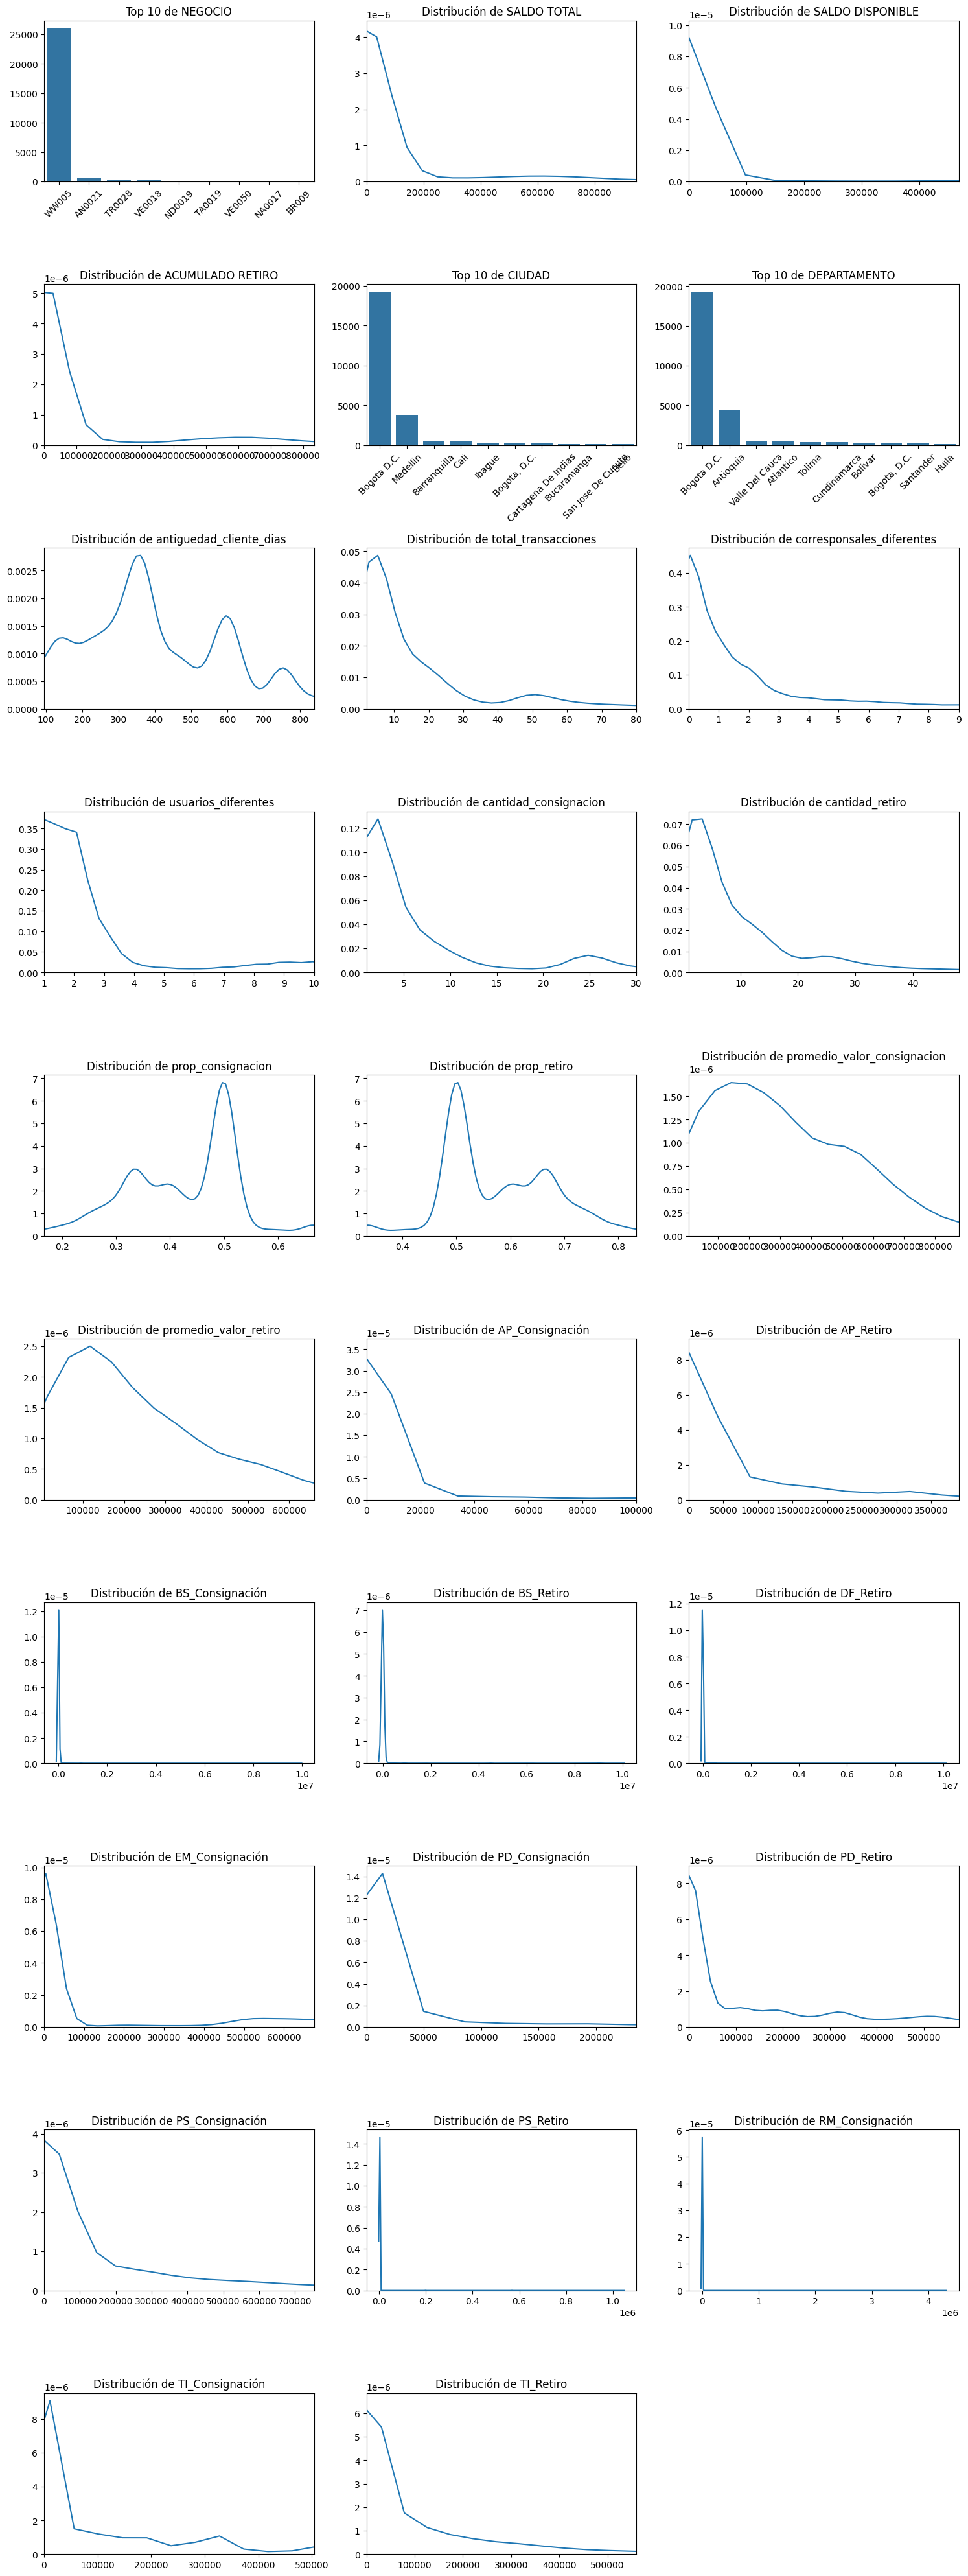

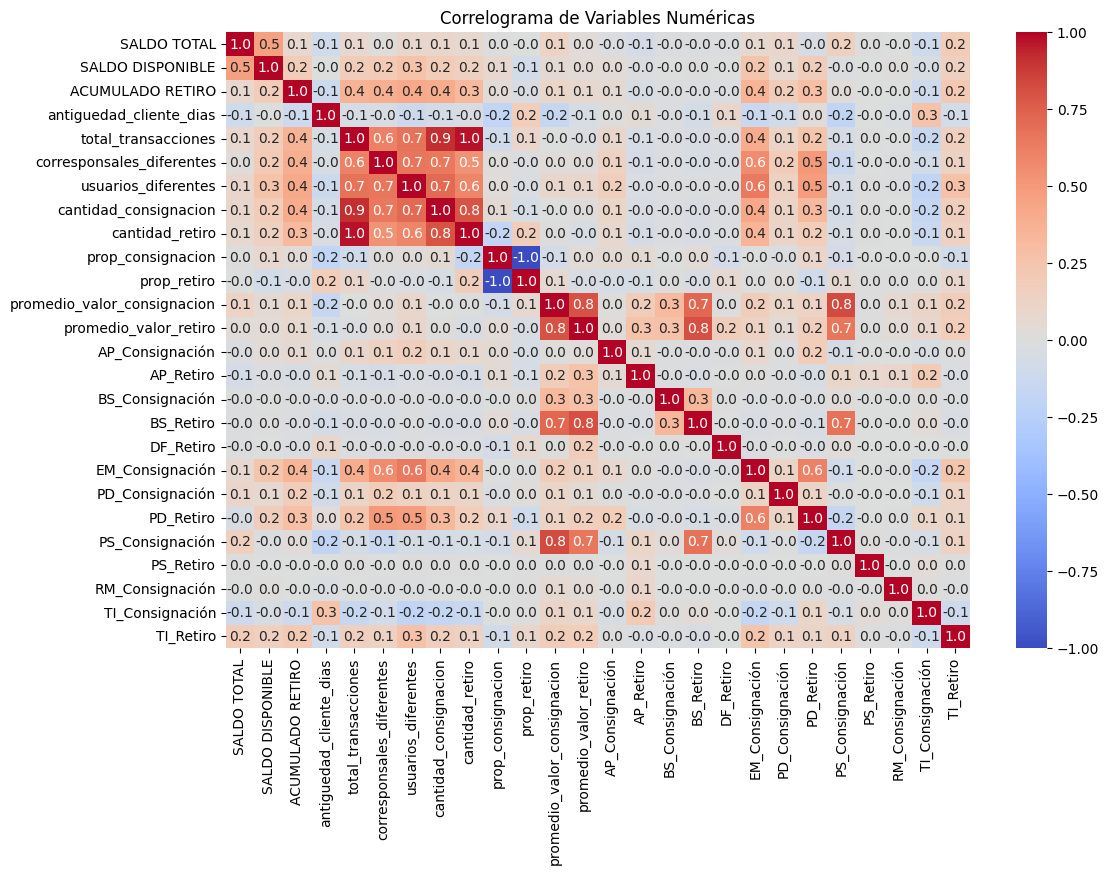

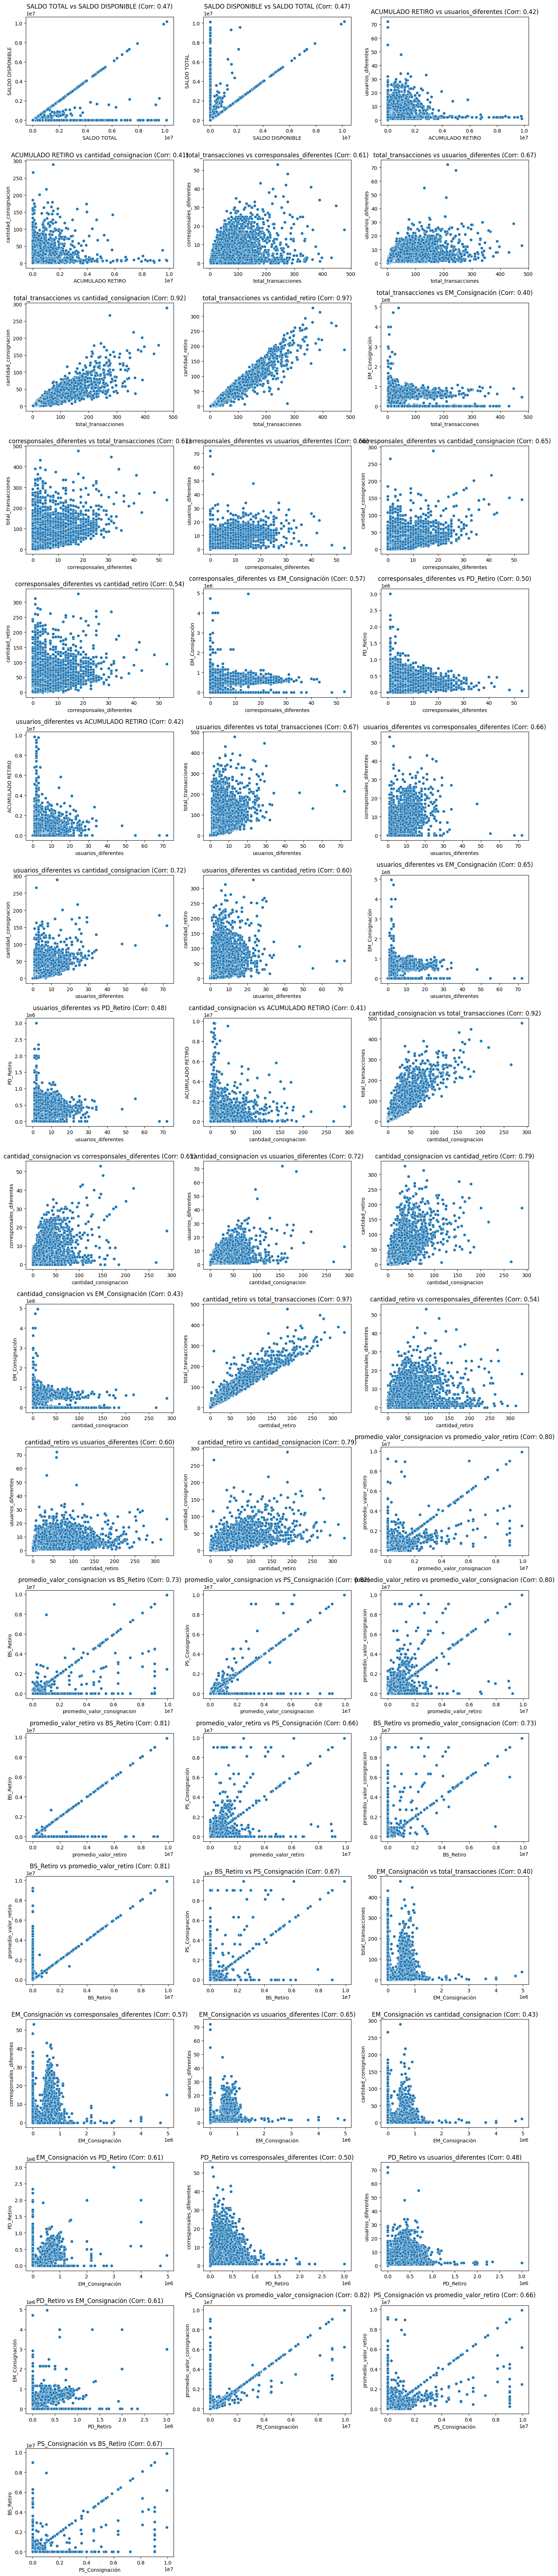

In [16]:
print("#################   Análisis gráfico   #################")

def analyze_dataframe(df):
    ##################### Primero: distribuciones #####################
    num_columns = len(df.columns)
    cols = 3  # Número de columnas en el grid
    rows = (num_columns + cols - 1) // cols  # Calcular filas necesarias
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
    axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente
    
    #Para cada variable, reviso si es numerica o categorica
    for i, column in enumerate(df.columns):
        ax = axes[i]
        if pd.api.types.is_float_dtype(df[column]) or pd.api.types.is_integer_dtype(df[column]):
            df_grafico = df.copy()
            
            #if column in ['SALDO TOTAL', 'SALDO DISPONIBLE', 'ACUMULADO RETIRO', 'promedio_valor_consignacion', 'promedio_valor_retiro', 'AP_Consignación', 'AP_Retiro', 'BS_Consignación', 'BS_Retiro', 'DF_Retiro', 'EM_Consignación', 'PD_Consignación', 'PD_Retiro', 'PS_Consignación', 'PS_Retiro', 'RM_Consignación', 'TI_Consignación', 'TI_Retiro']:
                #constante = 1
                #df_grafico[column] = np.log(df_grafico[column] + constante)
                
            sns.kdeplot(df_grafico[column], ax=ax)
            ax.set_title(f'Distribución de {column}')
            
            # Los outliers dificultan la interpretacion, por lo que corto en el intervalo entre el percentil 5 y 90
            corte_bajo = np.percentile(df_grafico[column].dropna(), 5)
            corte_alto = np.percentile(df_grafico[column].dropna(), 95)
            
            # En caso no haya datos, no cambio los limites de los ejes
            if corte_bajo != corte_alto:
                ax.set_xlim(corte_bajo, corte_alto)
            
        #Para las categoricas solo pongo diagrama de barras
        elif pd.api.types.is_object_dtype(df[column]):
            top_10 = df[column].value_counts().nlargest(10)
            sns.barplot(x=top_10.index, y=top_10.values, ax=ax)
            ax.set_title(f'Top 10 de {column}')
            ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas
        ax.set_xlabel('')
        ax.set_ylabel('')
    
    # Elimino ejes sobrantes si no se llenó el grid completo
    for i in range(num_columns, rows * cols):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

    ##################### Segundo: correlograma #####################
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,  fmt=".1f")
    plt.title('Correlograma de Variables Numéricas')
    plt.show()

    ##################### Tercero: Grafico las correlaciones mas interesantes #####################
    signific_corr = corr[((corr > 0.4) & (corr < 1)) | ((corr < -0.4) & (corr > -1))]
    signific_parejas = signific_corr.unstack().dropna().reset_index()
    signific_parejas.columns = ['Variable 1', 'Variable 2', 'Correlación']

    num_signific = len(signific_parejas)
    cols = 3
    rows = (num_signific + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
    axes = axes.flatten()

    for i, (_, row) in enumerate(signific_parejas.iterrows()):
        ax = axes[i]
        sns.scatterplot(x=df[row['Variable 1']], y=df[row['Variable 2']], ax=ax)
        ax.set_title(f"{row['Variable 1']} vs {row['Variable 2']} (Corr: {row['Correlación']:.2f})")
        ax.set_xlabel(row['Variable 1'])
        ax.set_ylabel(row['Variable 2'])
    
    for i in range(num_signific, rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

#Grafico
analyze_dataframe(df_final)
